## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
from textblob import TextBlob
from wordcloud import WordCloud
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading MoneyLion Dataset

In [2]:
df = pd.read_csv('MoneyLion Final 2.csv')
df.head()

,date,username,tweet
0,16/08/2021,jonahlupton,@Sureshktrader Right now I like $UPST and $SOF...
1,16/08/2021,sureshktrader,@JonahLupton You were pitching Fuse moneylion ...
2,16/08/2021,bladentaj,"When I see this #MoneyLion trending, all I ima..."
3,15/08/2021,craigmo93689450,@MoneyLion Money lion is there when you need i...
4,14/08/2021,tbakerbroadmoor,We're already seeing public market valuations ...


In [3]:
df.shape

(13052, 3)

## Preprocessing the Dataset

In [4]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt


In [5]:
df.drop_duplicates(subset='tweet', inplace=True)
df.shape

(13052, 3)

In [6]:
# remove twitter handles (@user)
df ['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,date,username,tweet,clean_tweet
0,16/08/2021,jonahlupton,@Sureshktrader Right now I like $UPST and $SOF...,Right now I like $UPST and $SOFI the most — o...
1,16/08/2021,sureshktrader,@JonahLupton You were pitching Fuse moneylion ...,You were pitching Fuse moneylion acfew months...
2,16/08/2021,bladentaj,"When I see this #MoneyLion trending, all I ima...","When I see this #MoneyLion trending, all I ima..."
3,15/08/2021,craigmo93689450,@MoneyLion Money lion is there when you need i...,Money lion is there when you need it it's awe...
4,14/08/2021,tbakerbroadmoor,We're already seeing public market valuations ...,We're already seeing public market valuations ...


In [7]:
#remove special characters, numbers and punctuation
df ['clean_tweet'] = df ['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df ['clean_tweet'] = df ['clean_tweet'].str.replace("https", " ")
df ['clean_tweet'] = df ['clean_tweet'].str.replace("bit.ly", " ")
df ['clean_tweet'] = df ['clean_tweet'].str.replace("link", " ")
df ['clean_tweet'] = df ['clean_tweet'].str.replace("pic.twitter", " ")
df ['clean_tweet'] = df ['clean_tweet'].str.replace("referral", " ")
df ['clean_tweet'] = df ['clean_tweet'].str.replace("join", " ")
df ['clean_tweet'] = df ['clean_tweet'].str.replace("MoneyLion", " ")

df.head() 

,date,username,tweet,clean_tweet
0,16/08/2021,jonahlupton,@Sureshktrader Right now I like $UPST and $SOF...,Right now I like UPST and SOFI the most o...
1,16/08/2021,sureshktrader,@JonahLupton You were pitching Fuse moneylion ...,You were pitching Fuse moneylion acfew months...
2,16/08/2021,bladentaj,"When I see this #MoneyLion trending, all I ima...",When I see this # trending all I imagined wa...
3,15/08/2021,craigmo93689450,@MoneyLion Money lion is there when you need i...,Money lion is there when you need it it s awe...
4,14/08/2021,tbakerbroadmoor,We're already seeing public market valuations ...,We re already seeing public market valuations ...


In [8]:
df['clean_tweet'] = df['clean_tweet'].replace(to_replace=r'^https?:\/\/.*[\r\n]*',value='',regex=True)
df.head()

,date,username,tweet,clean_tweet
0,16/08/2021,jonahlupton,@Sureshktrader Right now I like $UPST and $SOF...,Right now I like UPST and SOFI the most o...
1,16/08/2021,sureshktrader,@JonahLupton You were pitching Fuse moneylion ...,You were pitching Fuse moneylion acfew months...
2,16/08/2021,bladentaj,"When I see this #MoneyLion trending, all I ima...",When I see this # trending all I imagined wa...
3,15/08/2021,craigmo93689450,@MoneyLion Money lion is there when you need i...,Money lion is there when you need it it s awe...
4,14/08/2021,tbakerbroadmoor,We're already seeing public market valuations ...,We re already seeing public market valuations ...


In [9]:
df ['clean_tweet'] = df ['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,date,username,tweet,clean_tweet
0,16/08/2021,jonahlupton,@Sureshktrader Right now I like $UPST and $SOF...,Right like UPST SOFI most once trades couple m...
1,16/08/2021,sureshktrader,@JonahLupton You were pitching Fuse moneylion ...,were pitching Fuse moneylion acfew months What...
2,16/08/2021,bladentaj,"When I see this #MoneyLion trending, all I ima...",When this trending imagined lion millionaire
3,15/08/2021,craigmo93689450,@MoneyLion Money lion is there when you need i...,Money lion there when need awesome bank SwgWXsL
4,14/08/2021,tbakerbroadmoor,We're already seeing public market valuations ...,already seeing public market valuations #finte...


In [10]:
df.shape

(13052, 4)

## Positive/Negative/Neutral

In [11]:
## To create subjectivity (use to tell how subjective or opinionated the tweet is)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

## To create polarity (use to tell how positive or negative the tweet is)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

## Create the Subjectivity and Polarity results columns in the df
df["Subjectivity"] = df['clean_tweet'].apply(getSubjectivity)
df["Polarity"] = df['clean_tweet'].apply(getPolarity)

def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else :
        return "Positive"

df["Analysis"] = df["Polarity"].apply(getAnalysis)
df.head()

,date,username,tweet,clean_tweet,Subjectivity,Polarity,Analysis
0,16/08/2021,jonahlupton,@Sureshktrader Right now I like $UPST and $SOF...,Right like UPST SOFI most once trades couple m...,0.517857,0.392857,Positive
1,16/08/2021,sureshktrader,@JonahLupton You were pitching Fuse moneylion ...,were pitching Fuse moneylion acfew months What...,0.000000,0.000000,Neutral
2,16/08/2021,bladentaj,"When I see this #MoneyLion trending, all I ima...",When this trending imagined lion millionaire,0.000000,0.000000,Neutral
3,15/08/2021,craigmo93689450,@MoneyLion Money lion is there when you need i...,Money lion there when need awesome bank SwgWXsL,1.000000,1.000000,Positive
4,14/08/2021,tbakerbroadmoor,We're already seeing public market valuations ...,already seeing public market valuations #finte...,0.066667,0.000000,Neutral


In [ ]:
#print all positive tweets

j=1
sortedDF =df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print (str(j)+ ') '+sortedDF['clean_tweet'][i])
        print()
        j = j+1

In [ ]:
#print all negative tweets

j=1
sortedDF =df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print (str(j)+ ') '+sortedDF['clean_tweet'][i])
        print()
        j = j+1

In [ ]:
#print all neutral tweets

j=1
sortedDF =df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Neutral'):
        print (str(j)+ ') '+sortedDF['clean_tweet'][i])
        print()
        j = j+1

In [12]:
#Get the percentage of positive tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['clean_tweet']

result = round ( (ptweets.shape[0] / df.shape[0] *100))
print (str(result)+ "% of positive tweets")


50% of positive tweets


In [13]:
negtweets = df[df.Analysis == 'Negative']
negtweets = negtweets['clean_tweet']

result = round ( (negtweets.shape[0] / df.shape[0] *100))
print (str(result)+ "% of negative tweets")

14% of negative tweets


In [14]:
netweets = df[df.Analysis == 'Neutral']
netweets = netweets['clean_tweet']

result = round ( (netweets.shape[0] / df.shape[0] *100))
print (str(result)+ "% of neutral tweets")


35% of neutral tweets


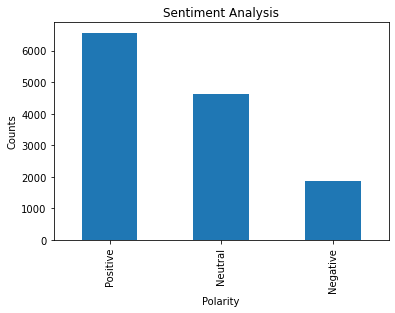

In [15]:
#Sho the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

## Exploratory Data Analysis

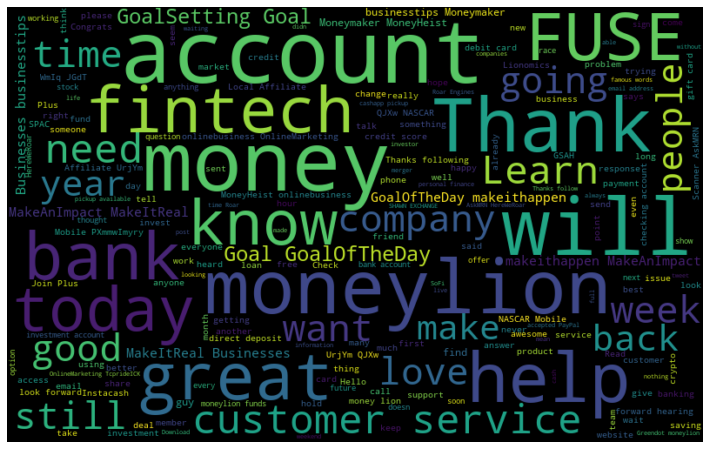

In [16]:
#Visualize the frequent words

all_words = " ".join([sentence for sentence in df ['clean_tweet']])

wordcloud = WordCloud (width =800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Export Data

In [ ]:
#df.to_csv(r'../Documents/MoneyLionCleanData.csv')

## Scatter Plot

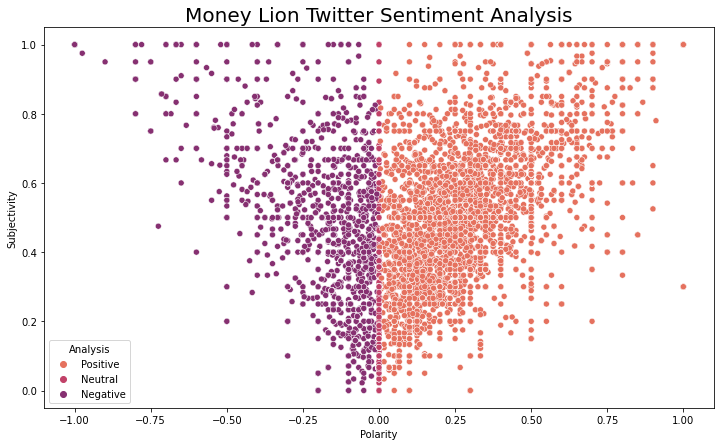

In [17]:
plt.figure(figsize=(12, 7))
data = pd.read_csv('MoneyLionCleanData.csv')
sns.scatterplot(data['Polarity'], data['Subjectivity'], 
                hue = data['Analysis'], edgecolor='white', 
                palette="flare")
plt.title("Money Lion Twitter Sentiment Analysis", fontsize=20)
plt.show()